In [1]:
%pip install pycaret

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import random
%matplotlib inline
import seaborn as sns
import pycaret

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

data = df

In [10]:
 # import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [11]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [12]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [13]:
# init setup on exp
exp.setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [14]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.5540
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0530
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0300
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2860
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0320
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1730
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1260
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1780
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0300
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.7360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [15]:
# compare models using OOP

exp = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0710
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0290
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0290
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2220
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0300
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1750
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1220
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3130
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0290
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.7700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

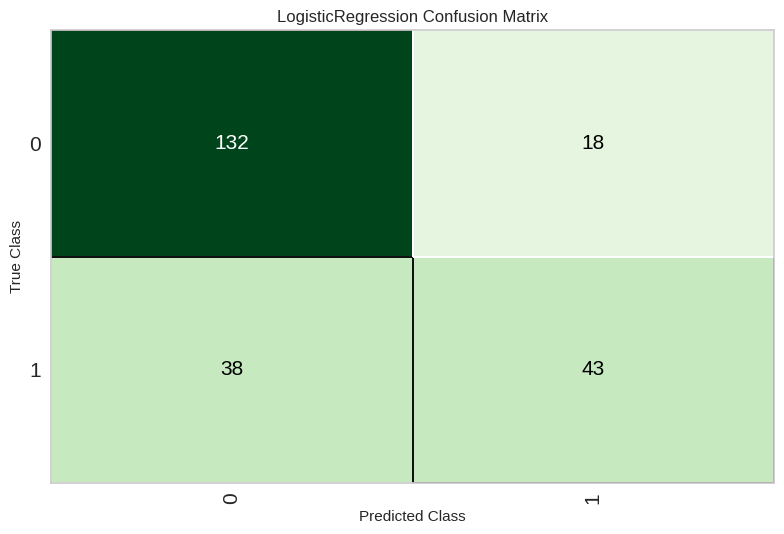

In [16]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

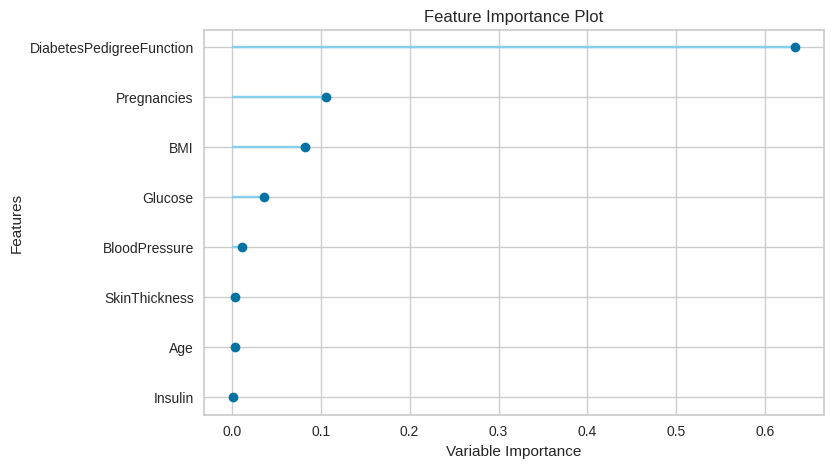

In [17]:
# plot feature importance
plot_model(best, plot = 'feature')

In [18]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [20]:
from pycaret.datasets import get_data
from pycaret.classification import *

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


#Lets work on our model now. We have an idea of what is the best model to use.


In [23]:
df = df.drop_duplicates()

In [26]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [27]:
X = data.drop(columns=['Outcome','Age', 'Insulin', 'SkinThickness'], axis = 1)
y = df['Outcome']


In [28]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [33]:
# import the necessary library
from sklearn.metrics import accuracy_score

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8177083333333334


In [30]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

In [31]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



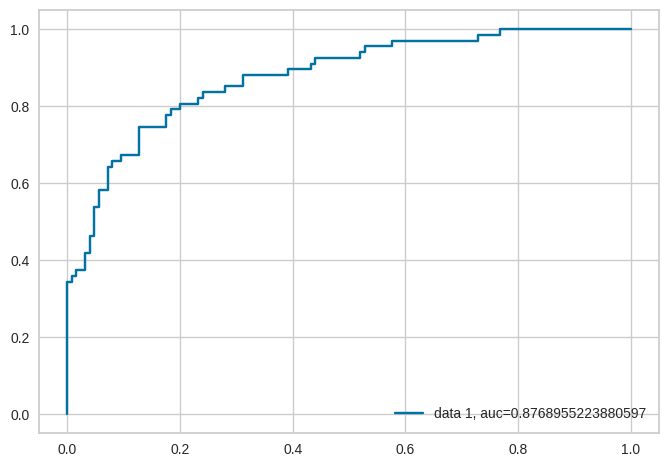

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()